# 一、主要代码

In [34]:
"""
本程序用于演示激光雷达的  .pcd.bin文件的解析与了解
"""

import numpy as np
import cv2  
import matplotlib.pyplot as plt
from tqdm import tqdm

In [35]:
# 定义一个简单的，bgr转rgb函数。方便matplotlib显示
def opencv2matandshow(img):
    b, g, r = cv2.split(img)
    img_cvt = cv2.merge((r, g, b))
    plt.imshow(img_cvt)

In [36]:
# 0. 首先，数据来源是nuscenes数据集 v1.0-mini数据集内的 sweeps/LIDAR_TOP其中一个激光雷达数据
file = "../../data/n015-2018-10-02-10-50-40+0800__LIDAR_TOP__1538448760497849.pcd.bin"
pc = np.frombuffer(open(file, "rb").read(), dtype=np.float32)
# print(pc.shape) # (173760,)

In [37]:
# 1. 了解数据结构，数据由5个部分组成
    # Data is stored as (x, y, z, intensity, ring index).
    # x y z 就是基于激光雷达的3d坐标系
    # intensity 反射强度，
    # ring index  第几条线，激光有32线， 他就是0-31的数字。 课程中不用
    # 所以改变下形状输出
#                                       x             y             z      intensity    ring index
# print(pc.reshape(-1, 5)[0])     # [-2.942755    -0.59551746  -1.7575045      20.         0.        ]
# print(pc.reshape(-1, 5)[10])    # [-4.5377426   -0.5805964   -1.4302253      36.         10.       ]

pc = pc.reshape(-1, 5)[:, :4] # ring index 不用体现在代码中就是
x, y, z, intensity = pc.T # 解包方法
x.shape, y.shape


((34752,), (34752,))

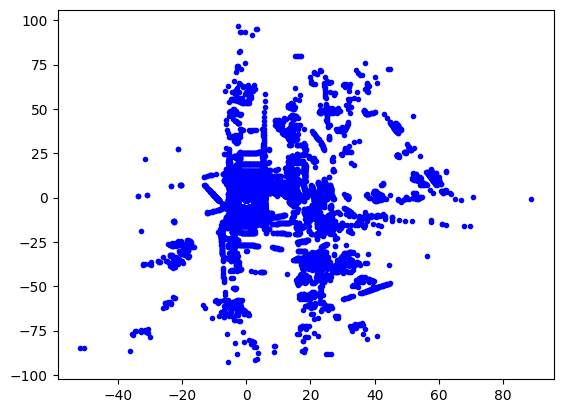

np.max(x) 	 88.75836181640625
np.min(x) 	 -51.632450103759766
np.max(y) 	 96.5278549194336
np.min(y) 	 -92.97260284423828
np.max(z) 	 14.154901504516602
np.min(z) 	 -3.679185152053833
np.max(intensity) 	 244.0
np.min(intensity) 	 0.0


In [38]:
# 2. 可视化 先不考虑z
# matplotlib可视化， 效果不理想。
plt.plot(x, y, "b.")
plt.show()
## 2.1 看结果注意 主要注意取值范围
print(f"np.max(x) \t {np.max(x)}")
print(f"np.min(x) \t {np.min(x)}")
print(f"np.max(y) \t {np.max(y)}")
print(f"np.min(y) \t {np.min(y)}")
print(f"np.max(z) \t {np.max(z)}")
print(f"np.min(z) \t {np.min(z)}")
print(f"np.max(intensity) \t {np.max(intensity)}")
print(f"np.min(intensity) \t {np.min(intensity)}")

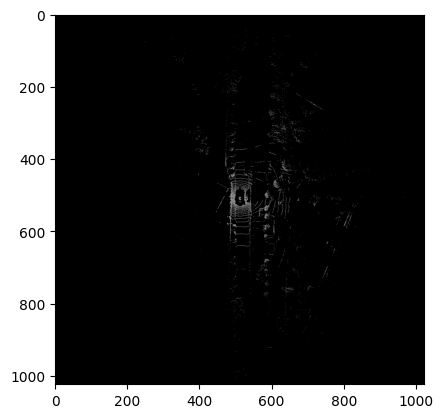

In [39]:
# 3. 可视化 考虑z，得到
# opencv可视化

# 设置图像的尺寸1024*1024
image_size = 1024

# 数据归一化
pc_range = 100 # 取100主要是上方数据均在  -100 - 100 之间
x1 = x / pc_range # 图像归一化到 -1 到 1
y1 = y / pc_range

# 数据放大到1024的尺度。
half_image_size = image_size / 2
x1 = x1 * half_image_size + half_image_size # 因为x有正有负且在-1到1之间。所以这样放大。
y1 = y1 * half_image_size + half_image_size 

# opencv的图像是可以用numpy创建的
image = np.zeros((image_size, image_size, 3), np.uint8)

for ix, iy, iintensity in zip(x1, y1, intensity):
    ix = int(ix)
    iy = int(iy)
    
    iintensity = iintensity / 255.0 * 128 + 127 # 重点：iintensity取值范围值0 - 255。
    # 这里主要是为了让iintensity以127为起点。iintensity越大 计算后的 iintensity更接近255
    
    # iz的取值范围  -17 到 13 (这个是手写ai视频里的范围。我这个例子里可能不是这样) 
    
    # 判断是否在图像范围内
    if ix > 0 and ix < image_size and iy > 0 and iy < image_size:
        image[iy, ix] = iintensity, iintensity, iintensity
        
cv2.imwrite("my-pc-with-intensity.jpg", image) # 会输出图片
opencv2matandshow(image) # 为了方便也提供了直接在jupyter中显示的函数
# cv2.imshow("111", image)
# cv2.waitKey(0)
# cv2.destoryAllWindows()

In [40]:
"""
此图格子代码, 演示了intensity逐渐增加的小动画。会输出output.avi
暂无实际意义
"""

# # 设置图像的尺寸1024*1024
# image_size = 1024

# # 数据归一化
# pc_range = 100 # 取100主要是上方数据均在  -100 - 100 之间
# x2 = x / pc_range # 图像归一化到 -1 到 1
# y2 = y / pc_range
# z2 = z

# # 数据放大到1024的尺度。
# half_image_size = image_size / 2
# x2 = x2 * half_image_size + half_image_size # 因为x有正有负且在-1到1之间。所以这样放大。
# y2 = y2 * half_image_size + half_image_size 

# # opencv的图像是可以用numpy创建的
# image = np.zeros((image_size, image_size, 3), np.uint8)

# # 
# # 输出avi
# fourcc = cv2.VideoWriter_fourcc(*'XVID') # VideoWriter中需要的参数
# out = cv2.VideoWriter("output.avi", fourcc, 30, (image_size, image_size))

# pbar = tqdm(range(0, 127), desc="11")
# for base in pbar:
#     for ix, iy, iz, iintensity in zip(x2, y2, z2, intensity):
#         ix = int(ix)
#         iy = int(iy)

#         iintensity = iintensity / 255.0 * 128 + base # intensity
#         # 判断是否在图像范围内
#         if ix > 0 and ix < image_size and iy > 0 and iy < image_size:
#             image[iy, ix] = iintensity, iintensity, iintensity
        
#     out.write(image)        
#     # cv2.imshow("frame", image)
#     opencv2matandshow(image)
#     pbar.desc = f"{base}"
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# out.release()
# # cv2.destroyAllWindows()

'\n此图格子代码, 演示了intensity逐渐增加的小动画。会输出output.avi\n暂无实际意义\n'

In [41]:
"""
本程序用于演示z逐渐增强的动画
暂无实际意义
"""

# # 设置图像的尺寸1024*1024
# image_size = 1024

# # 数据归一化
# pc_range = 100 # 取100主要是上方数据均在  -100 - 100 之间
# x3 = x / pc_range # 图像归一化到 -1 到 1
# y3 = y / pc_range
# z3 = z

# # 数据放大到1024的尺度。
# half_image_size = image_size / 2
# x3 = x3 * half_image_size + half_image_size # 因为x有正有负且在-1到1之间。所以这样放大。
# y3 = y3 * half_image_size + half_image_size 

# # opencv的图像是可以用numpy创建的
# image = np.zeros((image_size, image_size, 3), np.uint8)

# # 输出avi
# fourcc = cv2.VideoWriter_fourcc(*'XVID') # VideoWriter中需要的参数
# out = cv2.VideoWriter("iz-change.avi", fourcc, 30, (image_size, image_size))

# pbar = tqdm(range(0, 127), desc="11")
# for base in pbar:
#     for ix, iy, iz, iintensity in zip(x3, y3, z3, intensity):
#         ix = int(ix)
#         iy = int(iy)

#         alpha = min(1, max(0, (iz) / 5)) # iz是高度，单位以米为单位 
#         color = 128 * alpha + base
        
#         # 判断是否在图像范围内
#         if ix > 0 and ix < image_size and iy > 0 and iy < image_size:
#             image[iy, ix] = color, color, color
        
#     out.write(image)        
#     # cv2.imshow("frame", image)
#     pbar.desc = f"{base}"
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# out.release()
# # cv2.destroyAllWindows()

'\n本程序用于演示z逐渐增强的动画\n暂无实际意义\n'

# 二、使用z值的可视化

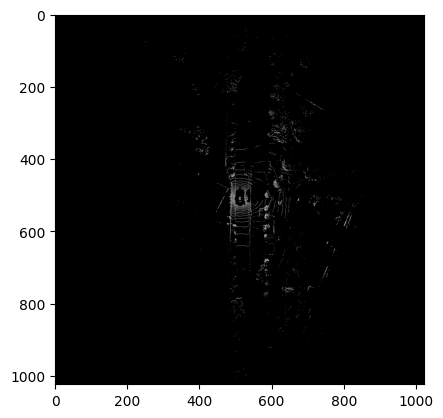

In [42]:
"""
正常的z的处理
"""
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm


# 0. 首先，数据来源是v1.0-mini数据集内的 sweeps/LIDAR_TOP
file = "../../data/n015-2018-10-02-10-50-40+0800__LIDAR_TOP__1538448760497849.pcd.bin"
pc = np.frombuffer(open(file, "rb").read(), dtype=np.float32)

pc = pc.reshape(-1, 5)[:, :4] # ring index 不用体现在代码中就是
x, y, z, intensity = pc.T # 解包方法
x.shape, y.shape

# opencv可视化

# 设置图像的尺寸1024*1024
image_size = 1024

# 数据归一化
pc_range = 100 # 取100主要是上方数据均在  -100 - 100 之间
x = x / pc_range # 图像归一化到 -1 到 1
y = y / pc_range

# 数据放大到1024的尺度。
half_image_size = image_size / 2
x = x * half_image_size + half_image_size # 因为x有正有负且在-1到1之间。所以这样放大。
y = y * half_image_size + half_image_size 

# opencv的图像是可以用numpy创建的
image = np.zeros((image_size, image_size, 3), np.uint8)

for ix, iy, iz, iintensity in zip(x, y, z, intensity):
    ix = int(ix)
    iy = int(iy)

    alpha = min(1, max(0, (iz) / 5)) # iz是高度，单位以米为单位
    # 视频中iz取值范围 -17 到  13  
    color = 128 * alpha + 127

    # 判断是否在图像范围内
    if ix > 0 and ix < image_size and iy > 0 and iy < image_size:
        image[iy, ix] = color, color, color
cv2.imwrite("res.jpg", image)  
opencv2matandshow(image)

In [ ]:
# 创建images文件夹
if not os.path.exists(r"img"):
    os.mkdir(r"img")

In [43]:
"""
本程序用于演示z逐渐  增高 的动画
"""

import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm


# 0. 首先，数据来源是v1.0-mini数据集内的 sweeps/LIDAR_TOP
file = "../../data/n015-2018-10-02-10-50-40+0800__LIDAR_TOP__1538448760497849.pcd.bin"
pc = np.frombuffer(open(file, "rb").read(), dtype=np.float32)

pc = pc.reshape(-1, 5)[:, :4] # ring index 不用体现在代码中就是

# # # 输出avi
image_size = 1024
fourcc = cv2.VideoWriter_fourcc(*'XVID') # VideoWriter中需要的参数
out = cv2.VideoWriter("z-change.avi", fourcc, 30, (image_size, image_size))

z1 = np.linspace(-3, 5, 500)
pbar = tqdm(z1, desc="11")
image_list = []
index = 0
for z in pbar:
    index += 1
    xy_coor = []
    pbar.desc = f"{z}"
    indices = np.argwhere(pc[:, 2] < z)
    res_point = pc[indices]
    res_point = np.squeeze(res_point)
    x, y, z, intensity = res_point.T # 解包方法

    pc_range = 100 # 取100主要是上方数据均在  -100 - 100 之间
    x = x / pc_range # 图像归一化到 -1 到 1
    y = y / pc_range

    half_image_size = image_size / 2
    x = x * half_image_size + half_image_size 
    y = y * half_image_size + half_image_size 

    image = np.zeros((image_size, image_size, 3), np.uint8)
    
    for ix, iy, iz, iintensity in zip(x, y, z, intensity):
        ix = int(ix)
        iy = int(iy)
        
        iintensity = iintensity / 255.0 * 128 + 127 # 重点：iintensity取值范围值0 - 255。

        if ix > 0 and ix < image_size and iy > 0 and iy < image_size:
            image[iy, ix] = iintensity, iintensity, iintensity      
    out.write(image)  
    cv2.imwrite(f"img/image{index}.jpg", image)   
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

out.release()

-2.246492985971944:  10%|▉         | 48/500 [00:00<00:01, 226.66it/s] 

5.0: 100%|██████████| 500/500 [00:45<00:00, 11.04it/s]                  


# GIF动画制作

In [44]:
# !pip install imageio


In [16]:
import imageio
import os
def compose_gif():
    root = r"img"
    img_paths = os.listdir(r"img")
    gif_images = []
    for path in img_paths:
        path = os.path.join(root, path)
        gif_images.append(imageio.imread(path))
    imageio.mimsave("test.gif",gif_images)

compose_gif()

FileNotFoundError: [Errno 2] No such file or directory: 'img'

# 点云缩放后的数据统计

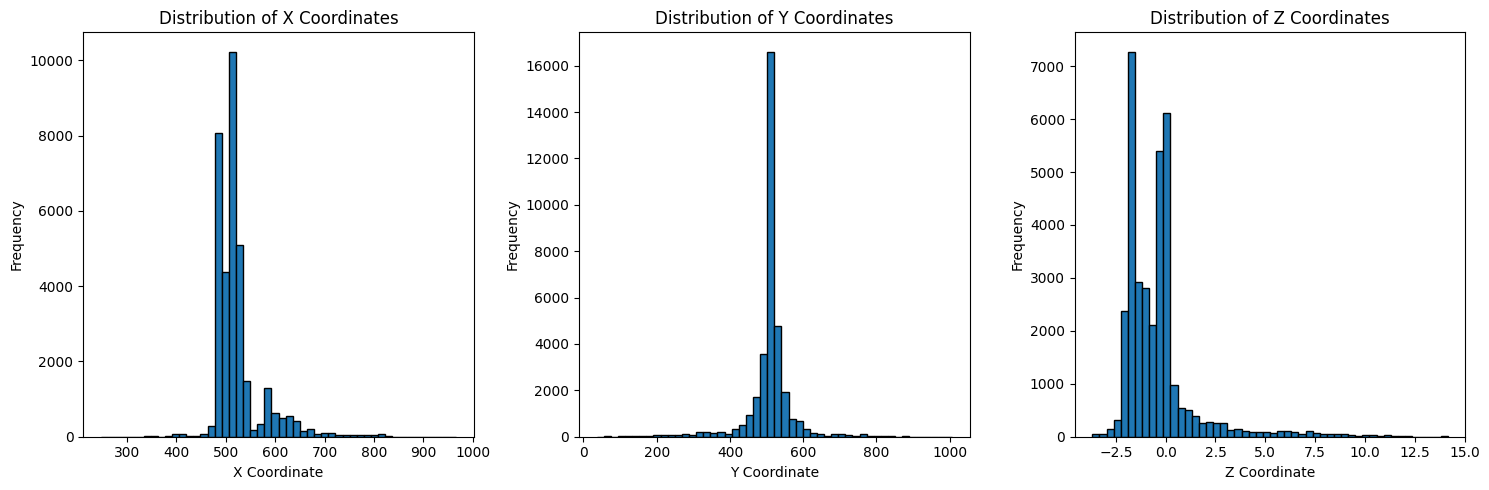

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 获取每个坐标轴的数据
x_coords = x
y_coords = y
z_coords = z

# 创建一个包含 1 行 3 列的子图布局
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 绘制 x 坐标的直方图
axs[0].hist(x_coords, bins=50, edgecolor='black')
axs[0].set_xlabel('X Coordinate')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of X Coordinates')

# 绘制 y 坐标的直方图
axs[1].hist(y_coords, bins=50, edgecolor='black')
axs[1].set_xlabel('Y Coordinate')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Y Coordinates')

# 绘制 z 坐标的直方图
axs[2].hist(z_coords, bins=50, edgecolor='black')
axs[2].set_xlabel('Z Coordinate')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Distribution of Z Coordinates')

# 调整子图之间的间距
plt.tight_layout()
plt.show()


# 新增
## 第一阶段，实现点云单独被缩放矩阵影响的动画

In [18]:
import numpy as np

# Load the .bin file
point_cloud_data = np.fromfile('/datav/121BEVFusion/shouxieai/bevfusion_02hero/data/n008-2018-08-01-15-16-36-0400__LIDAR_TOP__1533151603997687.pcd.bin', dtype=np.float32)
points = point_cloud_data.reshape(-1, 5)  # Each point has (x, y, z, intensity, ring)
points.shape

(34752, 5)

In [ ]:
# 创建images文件夹
if not os.path.exists(r"image"):
    os.mkdir(r"image")

100%|██████████| 69/69 [00:50<00:00,  1.36it/s]


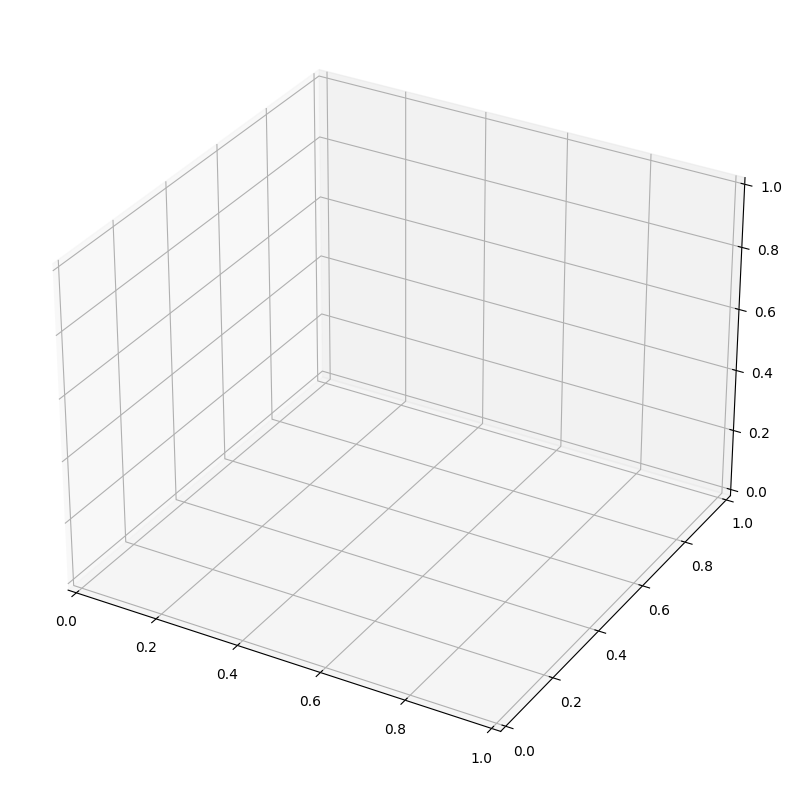

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

images_size = 1024
height_size = 50
x_range = 100
z_range = 15
points[:, 0] = points[:, 0] / x_range * images_size / 2
points[:, 1] = points[:, 1] / x_range * images_size / 2
points[:, 2] = points[:, 2] / z_range * height_size / 2


for i in tqdm(range(1, 70)):
    #旋转矩阵
    scale = i / 10
    points2 = np.zeros(points[...,:4].shape)
    points2[:, 0] = points[:, 0].copy() * scale
    points2[:, 1] = points[:, 1].copy() * scale
    points2[:, 2] = points[:, 2].copy() * scale


    ax.scatter(points2[:, 0], points2[:, 1], points2[:, 2], c=points[:, 3], s=1, cmap='jet')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')


    # 固定坐标轴
    ax.set_xlim([-512, 512])
    ax.set_ylim([-512, 512])
    ax.set_zlim([-150, 20])

    # ax.view_init(elev=20, azim=45)
    # ax.set_title('LiDAR Point Cloud Visualization')
    ax.set_axis_off()
    ax.set_xticks([]), ax.set_yticks([]), ax.set_zticks([])
    ax.set_xticklabels([]), ax.set_yticklabels([]), ax.set_zticklabels([])
    plt.savefig(f'./image/image_scale{int(scale*10)}.jpg')
    # plt.show()
    ax.clear()
    


In [23]:
import imageio
import os
def compose_gif():
    root = r"/datav/121BEVFusion/shouxieai/bevfusion_02hero/workspace/01Explain_LIDAR_DATA_FILE/image"
    img_paths = os.listdir(r"/datav/121BEVFusion/shouxieai/bevfusion_02hero/workspace/01Explain_LIDAR_DATA_FILE/image")
    gif_images = []
    for path in img_paths:
        path = os.path.join(root, path)
        gif_images.append(imageio.imread(path))
    imageio.mimsave("01suofang.gif",gif_images)

compose_gif()

/tmp/ipykernel_587320/3644025148.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  gif_images.append(imageio.imread(path))


## 第二阶段，尝试四元数旋转
$$Slerp(q_1, q_2; t) = \frac{\sin((1-t)\theta)}{\sin(\theta)} q_1 + \frac{\sin(t\theta)}{\sin(\theta)} q_2$$

In [1]:
import numpy as np

# Load the .bin file
point_cloud_data = np.fromfile('/datav/121BEVFusion/shouxieai/bevfusion_02hero/data/n008-2018-08-01-15-16-36-0400__LIDAR_TOP__1533151603997687.pcd.bin', dtype=np.float32)
points = point_cloud_data.reshape(-1, 5)  # Each point has (x, y, z, intensity, ring)
points.shape

(34752, 5)

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
import torch
from pyquaternion import Quaternion # 四元数操作的包
import math
import os
import sys

# 根据公式，定义插值函数
def slerp(q1, q2, t):
    dot = torch.dot(q1, q2)
    theta = torch.acos(dot)
    sin_theta = torch.sin(theta)
    
    s1 = torch.sin((1.0 - t) * theta) / sin_theta
    s2 = torch.sin(t * theta) / sin_theta
    
    return (s1 * q1) + (s2 * q2)

# 根据欧拉角，得到对应的四元数。仅限绕Z轴的角度的计算
def angle_to_quaternion(angle_deg):
    angle_rad = np.radians(angle_deg)
    w = np.cos(angle_rad / 2)
    z = np.sin(angle_rad / 2)
    return w, 0, 0, z


# 缓动函数
# def easeInOutSine(x):
#     return -(math.cos(math.pi * x) - 1) / 2

def easeInOutQuad(x):
    if x < 0.5:
        return 2 * x * x
    else:
        return 1 - math.pow(-2 * x + 2, 2) / 2
        

In [6]:
for i in range(1, 81):
    i = i / 81
    print(easeInOutQuad(i))

0.0003048315805517451
0.0012193263222069805
0.0027434842249657062
0.004877305288827922
0.0076207895137936285
0.010973936899862825
0.014936747447035511
0.019509221155311687
0.024691358024691357
0.030483158055174514
0.03688462124676116
0.0438957475994513
0.05151653711324493
0.059746989788142045
0.06858710562414265
0.07803688462124675
0.08809632677945434
0.09876543209876543
0.11004420057917999
0.12193263222069806
0.1344307270233196
0.14753848498704464
0.16125590611187318
0.1755829903978052
0.1905197378448407
0.2060661484529797
0.2222222222222222
0.23898795915256818
0.25636335924401765
0.2743484224965706
0.29294314891022705
0.312147538484987
0.33196159122085045
0.35238530711781735
0.3734186861758878
0.3950617283950617
0.41731443377533906
0.44017680231671996
0.4636488340192043
0.4877305288827922
0.5122694711172078
0.5363511659807956
0.55982319768328
0.5826855662246608
0.6049382716049383
0.6265813138241121
0.6476146928821827
0.6680384087791494
0.687852461515013
0.7070568510897728
0.725651577

In [87]:
# 没有缓动的，已经可以了。就开启这些注释

# # 四元数旋转，决定开始的旋转角度，与最终的角度
# # 绕Z轴旋转0度
# q_0_deg = angle_to_quaternion(0)
# q_0_deg = torch.tensor(q_0_deg)
# print(f"Quaternion for 0 degrees: {q_0_deg}")

# # 绕Z轴旋转10度
# q_340_deg = angle_to_quaternion(340)
# q_340_deg = torch.tensor(q_340_deg)
# print(f"Quaternion for 10 degrees: {q_340_deg}")

# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')

# images_size = 1024
# height_size = 50
# x_range = 100
# z_range = 15
# points[:, 0] = points[:, 0] / x_range * images_size / 2
# points[:, 1] = points[:, 1] / x_range * images_size / 2
# points[:, 2] = points[:, 2] / z_range * height_size / 2

# end = 81
# for i in tqdm(range(1, end)):
#     #缩放矩阵
#     scale = i / 10
#     points2 = np.zeros(points[...,:4].shape)
#     points2[:, 0] = points[:, 0].copy() * scale
#     points2[:, 1] = points[:, 1].copy() * scale
#     points2[:, 2] = points[:, 2].copy() * scale


#     # 具体插值案例
#     res = slerp(q_0_deg, q_340_deg, i/end).tolist()
#     rotation_matrix = Quaternion(res).rotation_matrix
#     points2[:,:3] = points2[:,:3]@rotation_matrix.T

#     ax.scatter(points2[:, 0], points2[:, 1], points2[:, 2], c=points[:, 3], s=1, cmap='jet')

#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
#     ax.set_zlabel('Z')


#     # 固定坐标轴
#     ax.set_xlim([-512, 512])
#     ax.set_ylim([-512, 512])
#     ax.set_zlim([-150, 20])

#     # ax.view_init(elev=20, azim=45)
#     # ax.set_title('LiDAR Point Cloud Visualization')
#     ax.set_axis_off()
#     ax.set_xticks([]), ax.set_yticks([]), ax.set_zticks([])
#     ax.set_xticklabels([]), ax.set_yticklabels([]), ax.set_zticklabels([])
#     plt.savefig(f'./image/image_scale{int(scale*10)}.jpg')
#     # plt.show()
#     ax.clear()

In [15]:
# 创建images文件夹
if not os.path.exists(r"image"):
    os.mkdir(r"image")


In [9]:

# 四元数旋转，决定开始的旋转角度，与最终的角度
# 绕Z轴旋转0度
q_0_deg = angle_to_quaternion(0)
q_0_deg = torch.tensor(q_0_deg)
print(f"Quaternion for 0 degrees: {q_0_deg}")

# 绕Z轴旋转10度
q_180_deg = angle_to_quaternion(180)
q_180_deg = torch.tensor(q_180_deg)
print(f"Quaternion for 10 degrees: {q_180_deg}")

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

images_size = 1024
height_size = 50
x_range = 100
z_range = 15
points[:, 0] = points[:, 0] / x_range * images_size / 2
points[:, 1] = points[:, 1] / x_range * images_size / 2
points[:, 2] = points[:, 2] / z_range * height_size / 2

end = 81 # 总次数
index = 0 # image命名
for i in tqdm(range(1, end)):
    # 缓动
    i = easeInOutQuad(i / end) # 需要0-1之间，所以除end
    
    #缩放矩阵
    scale = i * end / 10 # 还原回0-8之间
    points2 = np.zeros(points[...,:4].shape)
    points2[:, 0] = points[:, 0].copy() * scale
    points2[:, 1] = points[:, 1].copy() * scale
    points2[:, 2] = points[:, 2].copy() * scale


    # 具体插值案例
    res = slerp(q_0_deg, q_180_deg, i).tolist()
    rotation_matrix = Quaternion(res).rotation_matrix
    points2[:,:3] = points2[:,:3]@rotation_matrix.T

    ax.scatter(points2[:, 0], points2[:, 1], points2[:, 2], c=points[:, 3], s=1, cmap='jet')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')


    # 固定坐标轴
    ax.set_xlim([-512, 512])
    ax.set_ylim([-512, 512])
    ax.set_zlim([-150, 20])

    # ax.view_init(elev=20, azim=45)
    # ax.set_title('LiDAR Point Cloud Visualization')
    ax.set_axis_off()
    ax.set_xticks([]), ax.set_yticks([]), ax.set_zticks([])
    ax.set_xticklabels([]), ax.set_yticklabels([]), ax.set_zticklabels([])
    plt.savefig(f'./image/image_scale{int(index)}.jpg')
    index += 1
    # plt.show()s
    ax.clear()

SystemExit: 

In [104]:
import imageio
import os
def compose_gif():
    root = r"/datav/121BEVFusion/shouxieai/bevfusion_02hero/workspace/01Explain_LIDAR_DATA_FILE/image"
    img_paths = os.listdir(r"/datav/121BEVFusion/shouxieai/bevfusion_02hero/workspace/01Explain_LIDAR_DATA_FILE/image")
    gif_images = []
    for path in img_paths:
        path = os.path.join(root, path)
        gif_images.append(imageio.imread(path))
    imageio.mimsave("02Quaternion-80-180-huandong.gif",gif_images)
compose_gif()

/tmp/ipykernel_650617/552314553.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  gif_images.append(imageio.imread(path))
